### Урок 3. Классификация. Логистическая регрессия.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [11]:
y_pred1 = np.array([0.9, 0.1])
y_pred1

array([0.9, 0.1])

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

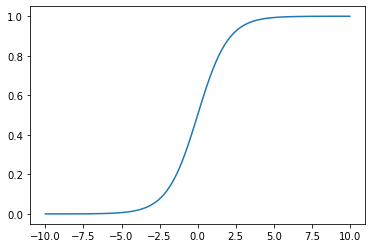

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [18]:
def calc_logloss2(y, y_pred):
    err_temp = []
    n = len(y)
    for i in range(n):
        if not ((y_pred[i] == 0) or (y_pred[i] == 1)):
            err_temp.append(- (y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])))
        err = np.mean(np.array(err_temp))
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [44]:
def eval_model2(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss2(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [55]:
W = eval_model2(X_st, y, iterations=5000, alpha=0.9)

500 [-7.0757049  -1.11516462 -1.25507391  6.26515333] 0.2752643036770602
1000 [-10.19991064  -1.34036331  -2.25276524   8.699232  ] 0.23761372241487452
1500 [-12.58567996  -1.53653541  -2.98102553  10.61503634] 0.21546836528662516
2000 [-14.62135964  -1.71116092  -3.58995582  12.26330385] 0.19929985975235412
2500 [-16.42327208  -1.86880166  -4.12232282  13.72643649] 0.18662502441127687
3000 [-18.0470591   -2.01246973  -4.59783114  15.04629133] 0.17633503862891337
3500 [-19.52719491  -2.14439184  -5.02830846  16.24974781] 0.16778985791936615
4000 [-20.8880602   -2.26630487  -5.42191271  17.35618846] 0.1605709862637463
4500 [-22.14809726  -2.37960048  -5.78469534  18.38042864] 0.15438631867660058
5000 [-23.321784    -2.48541207  -6.12133315  19.33416695] 0.1490238316058488


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [50]:
def calc_pred_proba(W: np.array, x: np.array) -> float:
    return sigmoid(np.dot(W, x))

In [73]:
W = eval_model(X_st, y, iterations=5000, alpha=0.9)
p = calc_pred_proba(W, X_st)
p

500 [-7.0757049  -1.11516462 -1.25507391  6.26515333] 0.2752643036770602
1000 [-10.19991064  -1.34036331  -2.25276524   8.699232  ] 0.23761372241487452
1500 [-12.58567996  -1.53653541  -2.98102553  10.61503634] 0.21546836528662516
2000 [-14.62135964  -1.71116092  -3.58995582  12.26330385] 0.19929985975235412
2500 [-16.42327208  -1.86880166  -4.12232282  13.72643649] 0.18662502441127687
3000 [-18.0470591   -2.01246973  -4.59783114  15.04629133] 0.17633503862891337
3500 [-19.52719491  -2.14439184  -5.02830846  16.24974781] 0.16778985791936615
4000 [-20.8880602   -2.26630487  -5.42191271  17.35618846] 0.1605709862637463
4500 [-22.14809726  -2.37960048  -5.78469534  18.38042864] 0.15438631867660058
5000 [-23.321784    -2.48541207  -6.12133315  19.33416695] 0.1490238316058488


array([3.83047205e-01, 4.73612173e-02, 9.99998179e-01, 8.45552963e-06,
       8.69201710e-01, 1.44498472e-01, 9.99999836e-01, 4.25744881e-02,
       5.38564548e-01, 9.99957251e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [74]:
def calc_pred(W, X):
    return np.round(calc_pred_proba(W, X), 0)

In [75]:
y_pred = calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [76]:
err_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y_pred[i] == 1 and y[i] == 1:
        err_matrix[0][0] += 1
    elif y_pred[i] == 1 and y[i] == 0:
        err_matrix[0][1] += 1
    elif y_pred[i] == 0 and y[i] == 1:
        err_matrix[1][0] += 1
    else:
        err_matrix[1][1] += 1
err_matrix

array([[5., 0.],
       [0., 5.]])

In [77]:
def precision(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])

def recall(err_matrix):
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])

def f_measure_b(b, err_matrix):
    return (1 + b **2) * (precision(err_matrix) * recall(err_matrix)) / (b ** 2 * precision(err_matrix) + recall(err_matrix))

In [78]:
precision(err_matrix)

1.0

In [79]:
recall(err_matrix)

1.0

In [80]:
f_measure_b(1.0, err_matrix)

1.0

6. Могла ли модель переобучиться? Почему?

In [ ]:
Ответа у меня. Хотелось бы узнать. Могу только предположить, что такое возможно, т.к. мы подбирали параметры eval_model.